# 2D Vector Exercises

## Draw the point in the plane and the arrow corresponding to the point `(-2, 2)`

Note that `Points` constructor requires one or more `vector`s

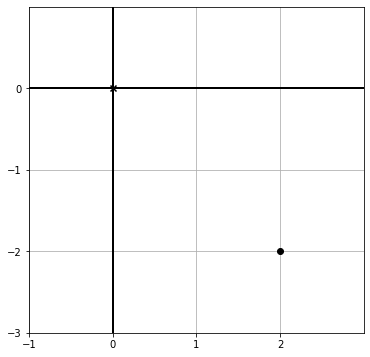

In [1]:
from vector_drawing import draw, Points, Arrow

point_coordinates = (2, -2)

draw(Points(point_coordinates))

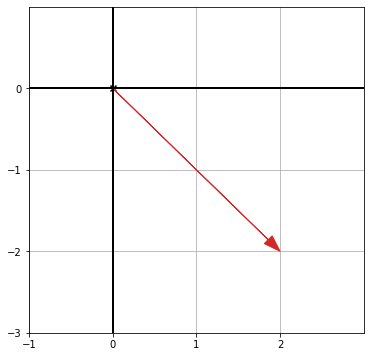

In [2]:
vector = Arrow(point_coordinates)

draw(vector)

## Draw the dinosaur from the following figure with the dots connected constructing a `Polygon` object instead of drawing the `Segment`s

When using `Polygon` the order of the points is also important

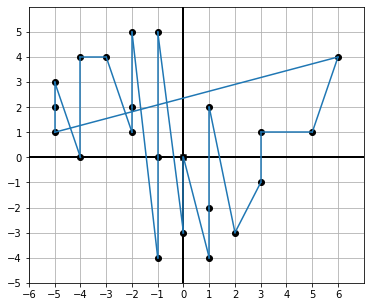

In [3]:
from vector_drawing import draw, Points, Polygon

dino_points = [(-5, 1), (-5, 2), (-5, 3), (-4, 0),
                (-4, 4), (-3, 4), (-2, 1), (-2, 2),
                (-2, 5), (-1, -4), (-1, 0), (-1, 5),
                (0, -3), (0, 0), (1, -4), (1, -2),
                (1, 2), (2, -3), (3, -1), (3, 1),
                (5, 1), (6, 4)]

draw(Points(*dino_points), Polygon(*dino_points))

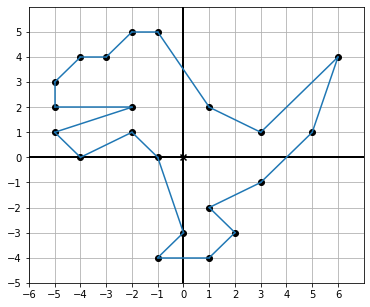

In [4]:
sorted_dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(Points(*sorted_dino_points), Polygon(*sorted_dino_points))

## Draw the vectors `(x, x ** 2)` for x in the range from x = -10 to x = 11 as points

Firstly using old-school approach (without comprehensions)

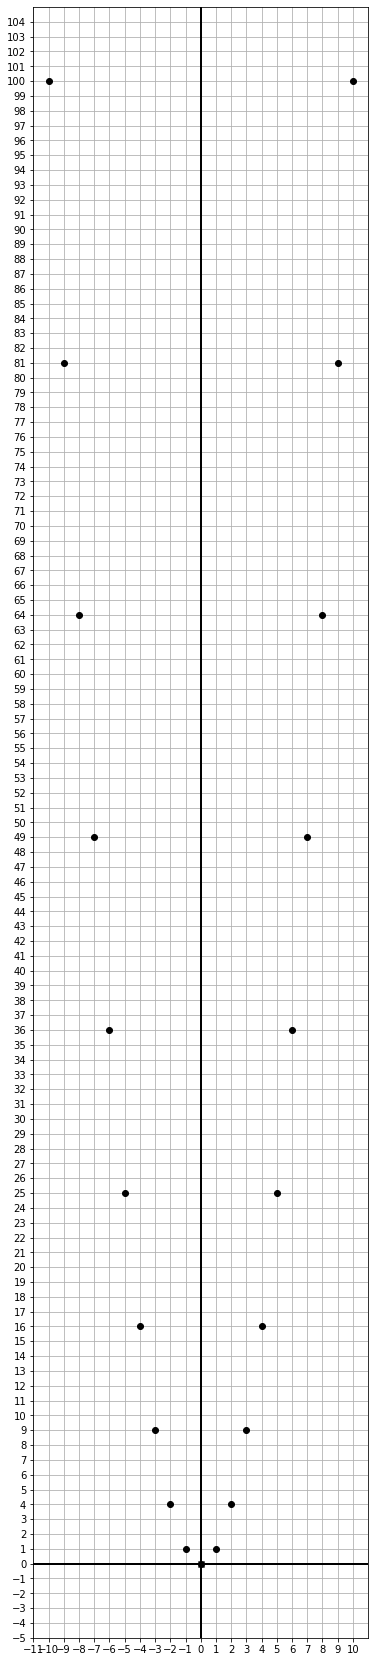

In [5]:
from vector_drawing import draw, Points
tuple_list = []

for x in range(-10, 11):
    tuple_list.append((x, x**2))
                  
draw(Points(*tuple_list))

The appearance can be fixed passing extra parameters to `draw(...)`:
+ `grid(1, 10)` &mdash; use one unit step for x-axis, ten for y-axis
+ `nice_aspect_ratio`&mdash; instructs draw not to keep the x-axis and y-axis scales the same

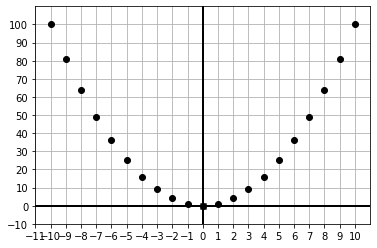

In [6]:
draw(Points(*tuple_list), grid=(1,10), nice_aspect_ratio=False )

And now using list comprehension to create the list of tuples representing the points for the chart

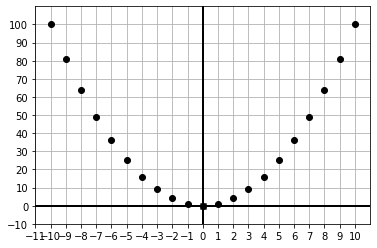

In [7]:
points = [(x, x**2) for x in range(-10, 11)]
draw(Points(*points), grid=(1, 10), nice_aspect_ratio=False)

## Calculate the results for the following operations

If the vector $ u = (-2, 0) $, the vector $ v = (1.5, 1.5) $, and the vector $ w = (4, 1) $:

$ 
u + v \\
v + w \\
u + w \\
u + v + w \\
$

In [8]:
def add(v1, v2, *vs):
    resulting_vector = (v1[0] + v2[0], v1[1] + v2[1])
    for v in vs:
        resulting_vector = (resulting_vector[0] + v[0], resulting_vector[1] + v[1])
    return resulting_vector

def print_result(msg, value):
    print('%s = %s' % (msg, value))

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print_result('u + v', add(u, v))
print_result('v + w', add(v, w))
print_result('u + w', add(u, w))
print_result('u + v + w', add(u, v, w))

u + v = (-0.5, 1.5)
v + w = (5.5, 2.5)
u + w = (2, 1)
u + v + w = (3.5, 2.5)


## Implement a function `add(*vectors)` that can add any number of vectors together

I have already defined a function `add(v1, v2, *vs)` that can do exactly the same, but the implementation feels procedural.

The following implementation looks cleaner, as it makes use of collection functions.

Let's review the `sum(...)` function:

In [9]:
nums = [1, 2, 3, 4, 5]
print(sum(nums))

tuples_list=[(1, 2), (3, 4)]

# We use a list comprehension to put together the t[0] components in a list, and the t[1] components in another list
rearranged_list = [[t[0] for t in tuples_list], [t[1] for t in tuples_list]]
print(rearrangement_list)


15


NameError: name 'rearrangement_list' is not defined

We can leverage `sum(...)` for a cleaner implementation:

In [10]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print(add(u))
print(add(u, v))
print(add(u, v, w))

(-2, 0)
(-0.5, 1.5)
(3.5, 2.5)


In [11]:
## Write a function `translate(translation, vectors)` that takes a translation vector and a list of input vectors, and returns a list of the input vectors all *translated* by the translation vector.

Example:
`translate((1, 1), [(0, 0), (0, 1), (-3, -3)]) = [(1, 1), (1, 2)(-2, -2)]`

SyntaxError: invalid syntax (<ipython-input-11-bf6b9b2194bf>, line 3)

In [12]:
def translate(translation_vector, vectors):
    translated_vectors = []
    for v in vectors:
        translated_vector = (v[0] + translation_vector[0], v[1] + translation_vector[1])
        translated_vectors.append(translated_vector)
    return translated_vectors

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


A revised implementation, that looks cleaner using *list comprehensions*

In [13]:
def translate(translation_vector, vectors):
    return [(translation_vector[0] + v[0], translation_vector[1] + v[1]) for v in vectors]

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


And it can be even simplified a bit more, as at the end, *translation* is adding

In [14]:
def translate(translation_vector, vectors):
    return [add(translation_vector, v) for v in vectors]

print(translate((1, 1), [(0, 0), (0, 1), (-3, -3)]))

[(1, 1), (1, 2), (-2, -2)]


## Any sum of vectors $ v + w $ gives the same result as $ w + v $. Explain why this is true using the definition of the vector sum on coordinates and also draw a picture to demonstrate it geometrically.

Let's assume $ v = (v_{x}, v_{y}) $ and $ w = (w_{x}, w_{y}) $.

As $ v + w = (v_{x} + w_{x}, v_{y} + w_{y}) $ and $ a + b = b + a $ (commutative property) then:

$ v + w = w + v $

Let's demonstrate it graphically in a example:

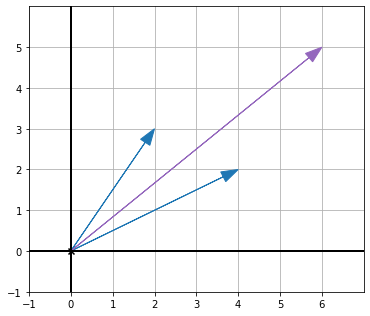

In [15]:
from vector_drawing import blue, purple, red

v = (4, 2)
w = (2, 3)

draw(
    Arrow(v, color=blue),
    Arrow(w, color=blue),
    Arrow(add(v, w), color=purple)
)

It gets clearer using the *tip-to-tail* method

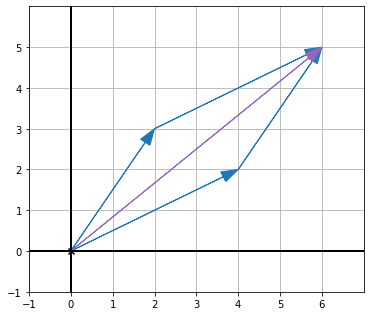

In [16]:

draw(
    Arrow(v, color=blue),
    Arrow(add(v, w), v, color=blue),
    Arrow(w, color=blue),
    Arrow(add(w, v), w, color=blue),
    Arrow(add(v, w), color=purple)
    )

Thus, the *sum vector* represents the diagonal of the parallelogram.

## Write a Python function using vector addition to display 100 simultaneous and non-overlapping copies of the dinosaur.

First of all let's draw the first copy of the dinosaur, using `draw(Polygon(...))`

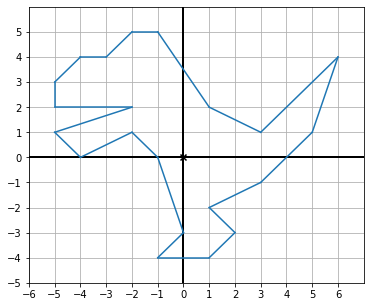

In [17]:
sorted_dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(Polygon(*sorted_dino_points))

Now, let's manually draw in a row 2 non-overlapping dinosaurs.

| NOTE: |
| :---- |
| The dinousaur length is the distance between the leftmost x coordinate, and the rightmost x coordinate |

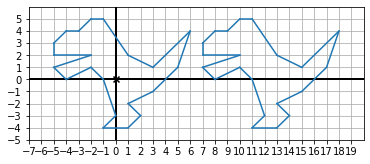

In [18]:
min_x = min([x[0] for x in sorted_dino_points])
max_x = max([x[0] for x in sorted_dino_points])
dino_length = max_x - min_x

translated_dino_points = [add((dino_length + 1, 0), v) for v in sorted_dino_points]

draw(
    Polygon(*sorted_dino_points),
    Polygon(*translated_dino_points)
)

Now we can automate it for 2 dinos

[[(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)], [(18, 4), (15, 1), (13, 2), (11, 5), (10, 5), (9, 4), (8, 4), (7, 3), (7, 2), (10, 2), (7, 1), (8, 0), (10, 1), (11, 0), (12, -3), (11, -4), (13, -4), (14, -3), (13, -2), (15, -1), (17, 1)]]


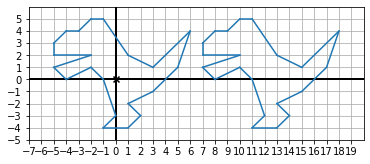

In [19]:
translated_dinos = [ [add(( (dino_length + 1) * i, 0), v) for v in sorted_dino_points] for i in range(0, 2)]
print(translated_dinos)


translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons)

Now we can draw the first line of 10 dinos

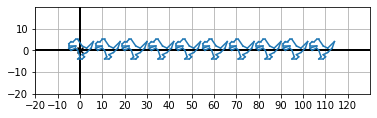

In [20]:
translated_dinos = [ [add(( (dino_length + 1) * i, 0), v) for v in sorted_dino_points] for i in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))

And now we can do similarly for different rows

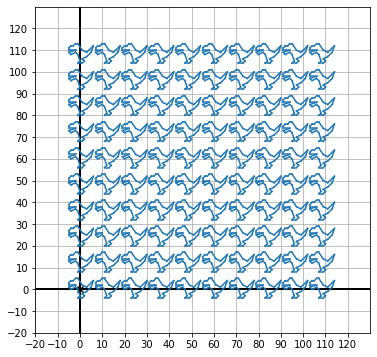

In [21]:
# I'm pretty sure this can optimized as I'm traversing the list of points 4 times!
min_x = min([x[0] for x in sorted_dino_points])
max_x = max([x[0] for x in sorted_dino_points])
dino_length = max_x - min_x

min_y = min([y[0] for y in sorted_dino_points])
max_y = max([y[0] for y in sorted_dino_points])
dino_height = max_y - min_y

translated_dinos = [ [add(( (dino_length + 1) * i, (dino_height + 1) * j), v) for v in sorted_dino_points] for i in range(0, 10) for j in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))


{'length': 11, 'height': 9}


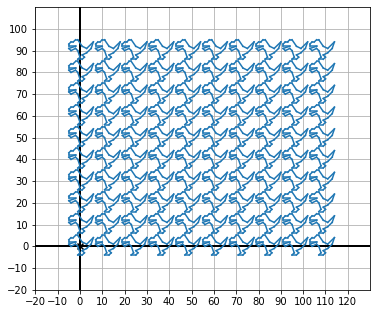

In [22]:
def get_shape_dimensions(*shape_points):
    min_x = float('inf')
    max_x = float('-inf')
    min_y = float('inf')
    max_y = float('-inf')
    for p in dino_points:
        min_x = p[0] if p[0] < min_x else min_x
        max_x = p[0] if p[0] > max_x else max_x
        min_y = p[1] if p[1] < min_y else min_y
        max_y = p[1] if p[1] > max_y else max_y
    return { "length": max_x - min_x, "height": max_y - min_y }

print(get_shape_dimensions(*sorted_dino_points))

dino_dimensions = get_shape_dimensions(*sorted_dino_points)
translated_dinos = [ [add(( (dino_dimensions["length"] + 1) * i, (dino_dimensions["height"] + 1) * j), v) for v in sorted_dino_points] for i in range(0, 10) for j in range(0, 10)]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=(10, 10))

It can be simplified a little bit with the `translate(...)` function defined in a previous exercise:

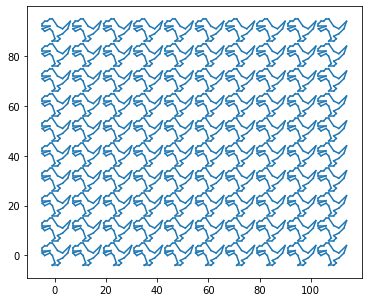

In [23]:
hundred_dinos = [ [translate((dino_dimensions["length"] + 1, dino_dimensions["height"] + 1), sorted_dino_points)]]
translated_polygons = [Polygon(*dino_points) for dino_points in translated_dinos]

draw(*translated_polygons, grid=None, axes=None, origin=None)

## Calculate the possible y coordinates for a vector whose $ x $ component is $ (1, 0) $ and its length is 6.

$
v = (1, v_{y}) \\
length(v) = \sqrt{1^{2} + v_{y}^{2}} = 6 \\
1^{2} + v_{y}^{2} = 36 \\
y = \pm \sqrt{35}
$

## Calculate the longest vector among the dino vectors using Python

Python provides the function `max(...)` that can be applied to iterables.

The first argument is the collection of elements to be scanned, and there is a named argument `key` that can be used to specify the function that *scores* each of the elements.

The function does not return the result of applying the function, but rather the element that will get the max result after applying the function to it.

In [24]:
from math import sqrt

def length(vector):
    return sqrt(vector[0] ** 2 + vector[1] ** 2)

max(sorted_dino_points, key=length)

(6, 4)

| NOTE: |
| :---- |
| This can be used to get the dimensions of the dino quite succinctly |


In [25]:
print(max(sorted_dino_points, key=lambda v: v[0]))
print(min(sorted_dino_points, key=lambda v: v[0]))

(6, 4)
(-5, 3)


## Suppose a vector $ w $ has the coordinates $ (\sqrt{2}, \sqrt{3}) $. Calculate the approximate coordinates of the scalar product $ \pi \cdot w $

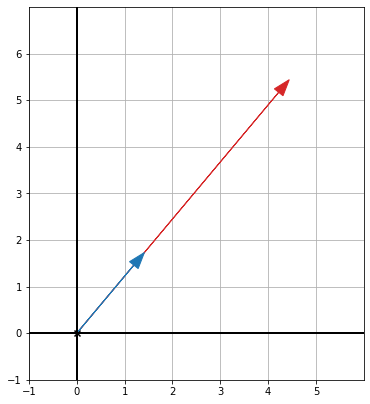

In [26]:
from math import pi

def scalar_product(scalar, vector):
    return (scalar * vector[0], scalar * vector[1])

w = (sqrt(2), sqrt(3))
result = scalar_product(pi, w)

draw(
    Arrow(result, color= red),
    Arrow(w, color=blue)    
)

## Write a Python function `scale(s, v)` that scales the vector `v` by the factor `s`

In [27]:
def scale(s, v):
    return (s * v[0], s * v[1])

## Demonstrate that scaling a vector $ \vec{v} $ by a factor $ r $ also scales the length of the vector (denoted as $ \lVert \vec{v} \rVert $ or $ | \vec{v} | $) by the same factor.

It is very easy to demonstrate leveraging on the *Pythagorean Theorem* and basic algebra:

$
\vec{v} = (a, b) \\
|\vec{v}| = |(a, b)| = \sqrt{a^{2} + b^{2}} \\
|s \cdot \vec{v}| = |(s \cdot a, s \cdot b)| = \sqrt{(s \cdot a)^{2} + (s \cdot b)^{2}} \\
\sqrt{(s \cdot a)^{2} + (s \cdot b)^{2}} = \sqrt{s^{2} \cdot ( a^{2} + b)^{2}}  = \sqrt{s^{2}} \cdot \sqrt{ a^{2} + b^{2} } = \\
s \cdot \sqrt{ a^{2} + b^{2} } = s \cdot |\vec{v}|
$

There is caveat, though: $ s > 0 $ 



## Suppose $ \vec{u} = (-1, 1) $ and $ \vec{v} = (1, 1) $ and suppose $ r $ and $ s $ are real numbers. Let's assume $ -1 < r < 1 $ and $ -3 < s < 3 $. Where are the possible points in the plane where the vector $ r \cdot \vec{u} + s \cdot \vec{v} $ could end up?

Using brute-force, and the `NumPy` package is easy to see that the possible points in the plane correspond to a parallelogram (rectangle) as depicted below.

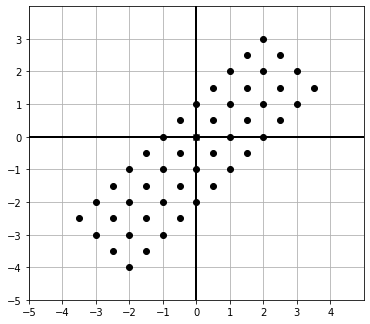

In [28]:
import numpy as np

u = (-1, 1)
v = (1, 1)
r_range = np.arange(-1, 1, 0.5)
s_range = np.arange(-3, 3, 0.5)

points = [add(scalar_product(r, u), scalar_product(s, v)) for r in r_range for s in s_range]

draw(Points(*points))

It can be also done without `NumPy` and using a *uniform* random distribution:

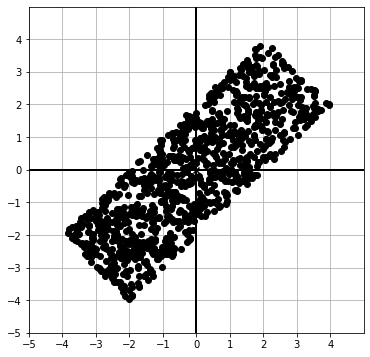

In [29]:
from random import uniform

u = (-1, 1)
v = (1, 1)

def random_r():
    return uniform(-1, 1)

def random_s():
    return uniform(-3, 3)

possible_points = [add(scalar_product(random_r(), u), scalar_product(random_s(), v)) for i in range(0, 1000)]

draw(Points(*possible_points))

## Show algebraically that a vector and its opposite have the same length

Let's assume $ \vec{v} = (a, b) $

$
| -\vec{v} | = \sqrt{(-a)^{2} + (-b)^{2}} = \\
\sqrt{(-1 \cdot a)^{2} + (-1 \cdot b)^{2}} = \\
\sqrt{(-1)^{2} \cdot a^{2} + (-1)^2 \cdot b^{2}} = \\
\sqrt{a^{2} + b^{2}} = \\
| \vec{v} |
$

## For vectors $ \vec{u} = (-2, 0) $, $ \vec{v} = (1.5, 1.5) $ and $ \vec{w} = (4, 1) $ what are the results for the operations $ \vec{v} - \vec{w} $, $ \vec{u} - \vec{v} $ and $ \vec{w} - \vec{v} $?

In [30]:
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] -v2[1])

u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

print('v - w = {0}'.format(subtract(v, w)))
print('u - v = {0}'.format(subtract(u, v)))
print('w - v = {0}'.format(subtract(w, v)))

v - w = (-2.5, 0.5)
u - v = (-3.5, -1.5)
w - v = (2.5, -0.5)


## Write a Python function that returns the distance between two input vectors `distance(v1, v2)`

This can be easily done, recalling the `tip-to-tail` addition of vectors.

For example:

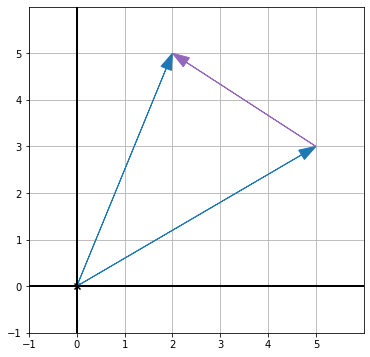

In [31]:
v1 = (5, 3)
v2 = (2, 5)

draw(
    Arrow(v1, color=blue),
    Arrow(v2, color=blue),
    Arrow(v2, v1, color=purple)
)

The purple vector is the vector representing the distance between v1 and v2.
Also, `v1 + purple_vector = v2`.

Therefore:

In [32]:
def distance(v1, v2):
    return sqrt((v2[0] - v1[0]) ** 2 + (v2[1] - v1[1]) ** 2)

distance(v1, v2)

3.605551275463989

Although this works fine, we could have relied on already defined functions, as the distance vector is the vector resulting of subtracting `v2` from `v1`.

| NOTE |
| :--- |
| As we are calculating the distance, `length(subtract(v1, v2)) == length(subtract(v2, v1))`. |

In [33]:
def distance(v1, v2):
    return length(subtract(v2, v1))

distance(v1, v2)

3.605551275463989

## Write a Python function `Perimeter(vectors)` that takes a list of vectors as an argument and returns the sum of distances from each vector to the next, including the distance from the last vector to the first. Use this function to calculate the perimeter of the dino.

In [34]:
# first procedurally

def perimeter(vectors):
    result = 0
    for i in range(0, len(vectors) - 1):
        result += distance(vectors[i], vectors[i + 1])
    result += distance(vectors[-1], vectors[0])
    return result

square_perimeter = perimeter([(0, 0), (1, 0), (1, 1), (0, 1)])
print('perimeter of the square is {0}'.format(square_perimeter))

dino_perimeter = perimeter(sorted_dino_points)
print('perimeter of the dino is {0}'.format(dino_perimeter))

perimeter of the square is 4.0
perimeter of the dino is 44.77115093694563


Implementation can be refactored as with *list comprehensions* and collection functions to achieve a more succinct and expressive solution

In [35]:
def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1) % len(vectors)]) for i in range(0, len(vectors))]
    return sum(distances)

square_perimeter = perimeter([(0, 0), (1, 0), (1, 1), (0, 1)])
print('perimeter of the square is {0}'.format(square_perimeter))

dino_perimeter = perimeter(sorted_dino_points)
print('perimeter of the dino is {0}'.format(dino_perimeter))

perimeter of the square is 4.0
perimeter of the dino is 44.77115093694563


## Let $ \vec{u} = (1, 2) $. Suppose there is another vector $ \vec{v} $ with positive integer coordinates $ (n, m) $ such that $ n > m $ and has a distance of $ 13 $ from $ \vec{u} $. What is the displacement from $ \vec{u} $ to $ \vec{v} $?

The idea of the exercise is to use the *brute force* to obtain the solution(s). We use Python syntax to specify the mathematical conditions that must be satisfied:

| NOTE |
| :--- |
| I have no idea where those ranges are coming from, but it is interesting to understand the syntax for nested loops and if clauses so I have kept it 😝 |

In [36]:
for n in range(-12, 15):
    for m in range(-14, 13):
        if distance((n, m), (1, -1)) == 13 and n > m > 0:
            print('Found: (%d, %d)' % (n, m))


Found: (13, 4)


## Confirm that the vector given by Cartesian coordinates (-1.34, 2.68) has a length of approximately 3

In [37]:
print('length({0}) = {1}'.format((-1.34, 2.68), length((-1.34, 2.68))))

length((-1.34, 2.68)) = 2.9963310898497184


## The following figure shows a line that makes a 22° angle in the counterclockwise direction from the positive x-axis. Based on the picture, what is the approximate value of tan(22°)?

![Exercise: Line at 22°](../images/line_segment_at_22_degrees.png)



The tangent is defined as the ratio between the vertical and horizontal value of a point. And all the points on a given line has the same tangent.

In the image we see that the line goes along (5, 2) and (10,4).

Therefore:

In [38]:
print('tangent(22°) = {0}'.format(2 / 5))

tangent(22°) = 0.4


We can validate it using the `Math` package:

In [39]:
from math import tan

def to_radians(degrees):
    return (degrees * pi) / 180
        
print(tan(to_radians(22)))

0.4040262258351568


## Suppose I travel 8.5 units from the origin at an angle of 125°, measured counterclockwise from the positive x-axis. Given that `sin(125°) = 0.819` and `cos(125°) = -0.574` what are my final coordinates? Draw a picture to show the angle and path traveled.

The *polar coordinates* of a vector will let us solve the exercise very quickly.

My final position would be represented by the polar coordinates `(8.5, 125°)`, which can be converted into *Cartesian coordinates* using the known formula:

(-4.875399708983889, 6.962792376456433)


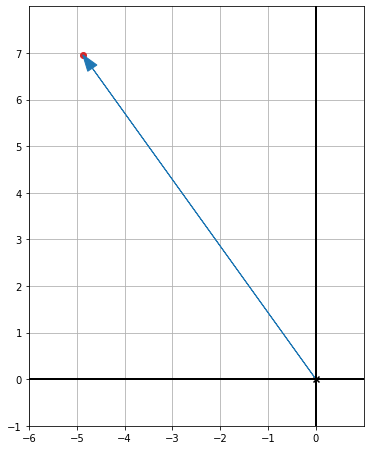

In [40]:
from math import sin, cos

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1] # this is like destructuring
    return (length * cos(angle), length * sin(angle))

vector = to_cartesian((8.5, to_radians(125)))
print(vector)

draw(Arrow(vector, color=blue), Points((vector), color=red))

## What are the sine and cosine of 0°? Of 90°? of 180°?

The sine and cosine can be geometrically interpreted as:
+ sine &mdash; the ratio between the vertical coordinate and the length of a vector
+ cosine &mdash; the ratio between the horizontal coordinate and the length of a vector

Thanks to this we can say:
```
sin(0°)=0 // all the points in a line with 0° inclination have 0 as vertical coordinate
cos(0°)=1 // all the points are (1, 0), (2, 0)... (n, 0) with lengths 1, 2, ...n

sin(90°)=1 // all the points are (0, 1), (0, 2)...(0, n) with lengths 1, 2, ...n
cos(90°)=0 // all the points in a line with 90° inclination have 0 as the horizontal coordinate

sin(180°)=0 // all the points in a line with 180° have 0 vertical coordinate
cos(180°)=-1 // all the points are (-1, 0), (-2, 0)... (-n, 0) with lengths 1, 2,... n
```

## The following diagram gives the measurements for a right triangle:

![Right Triangle](../images/right_triangle.png)

First confirm that the lengths are valid for a right triangle because they satisfy the Pythagorean theorem. Then calculate the values of sin(30°), cos(30°) and tan(30°) to three decimal places using the measurements in the diagram.

Let's recall the *Pythagorean theorem*:
> For a right triangle (a triangle having two sides meeting at a 90°), the square of the length of the longest side (hypotenuse) is the sum of the squares of the lengths of the other two sides.

Also, we know the geometric interpretation of the sine, cosine and tangent:

$
tan(α) = \frac{vertical_coordinate}{horizontal_coordinate} \\
sin(α) = \frac{vertical_coordinate}{vector_length} \\
cos(α) = \frac{horizontal_coordinate}{horizontal_coordinate} \\
$

In the drawing, we can set up the axis origin in the 30° apex, and consider the dark gray vector the hypotenuse, and the blue vectors the sides of the triangle (and the x and y components of the dark gray vector).

First, let's confirm that the given dimensions are compatible with the Pythagorean theorem:

$
1^{2} = \sqrt{(\frac{1}{2})^2 + (\frac{\sqrt{3}}{2})^2} = \sqrt{\frac{1}{4} + \frac{3}{4}} = \sqrt{1} = 1
$

Then, we can go for the 2nd part of the exercise:

$
tan(30°) = \frac{\frac{1}{2}}{\frac{\sqrt{3}}{2}} = \frac{1 \cdot 2}{2 \cdot \sqrt{3}} = \frac{1}{\sqrt{3}} \\
sin(30°) = \frac{\frac{1}{2}}{1} = \frac{1}{2} \\
cos(30°) = \frac{\frac{\sqrt{3}}{2}}{1} = \frac{\sqrt{3}}{2}
$

And we can validate it with Python:

In [41]:
print('tan(30°) = {0}; 1/√3 = {1}'.format(round(tan(to_radians(30)), 3), round(1 / sqrt(3), 3)))
print('sin(30°) = {0}; 1/2 = {1}'.format(round(sin(to_radians(30)), 3), 1 / 2))
print('cos(30°) = {0}; √3/2 = {1}'.format(round(cos(to_radians(30)), 3), round(sqrt(3) / 2, 3)))


tan(30°) = 0.577; 1/√3 = 0.577
sin(30°) = 0.5; 1/2 = 0.5
cos(30°) = 0.866; √3/2 = 0.866


## Looking at the triangle from the previous exercise from a different perspective, use it to calculate the values of sin(60°), cos(60°) and tan(60°).

![rotated triangle](../images/rotated_triangle.png)

This time we cut to the chase, we set the axes origin again in the 60° apex:

$
tan(60°) = \frac{\frac{\sqrt{3}}{2}}{\frac{1}{2}} = \frac{\sqrt{3} \cdot 2}{2 \cdot 1} = \sqrt{3} \\
sin(60°) = \frac{\sqrt{3}}{2} \\
cos(60°) = \frac{1}{2}
$

In [42]:
print('tan(60°) = {0}; √3 = {1}'.format(round(tan(to_radians(60)), 3), round(sqrt(3), 3)))
print('sin(60°) = {0}; √3/2 = {1}'.format(round(sin(to_radians(60)), 3), round(sqrt(3) / 2, 3)))
print('cos(60°) = {0}; 1/2 = {1}'.format(round(cos(to_radians(60)), 3), round(1 / 2, 3)))

tan(60°) = 1.732; √3 = 1.732
sin(60°) = 0.866; √3/2 = 0.866
cos(60°) = 0.5; 1/2 = 0.5


## The cosine of 50° is `0.643`. What is `sin(50°)` and what is `tan(50°)`? Draw a picture to help you calculate the answer.

As we're only dealing with angles, and leveraging the Pythagorean theorem we know:

$
sin(50°) = 0.643 = \frac{y}{r} \\
cos(50°) = \frac{x}{r} \\
tan(50°) = \frac{y}{x} \\
r^{2} = x^{2} + y^{2} \\
$

With $ y $ being the $ y $ coordinate and $ x $ the $ x $ coordinate of a triangle whose angle is 50°.

As we're only dealing with angle, we can assume that for some $ x $ and $ y $, $ r = 1 $.

Thus:
$
cos(50°) = 0.643 = y \\
sin(50°) = x \\
tan(50°) = \frac{y}{0.643} \\
1 = x^{2} + (0.643)^{2} \hspace{1ex} => \hspace{1ex} x = \sqrt(0.587) = 0.766 \\
$

Therefore:

$
sin(50°) = 0.766 \\
cos(50°) = 0.643 \\
tan(50°) = \frac{0.766}{0.643}
$

And we can validate it with a Python snippet:

In [43]:
print('sin(50°) = {0}'.format(round(sin(to_radians(50)), 3)))
print('cos(50°) = {0}'.format(round(cos(to_radians(50)), 3)))
print('tan(50°) = {0}'.format(round(tan(to_radians(50)), 3)))

sin(50°) = 0.766
cos(50°) = 0.643
tan(50°) = 1.192


Note also that we can derive from this approach and interesting reasoning that we can use for our benefit everytime that we need it:

![Right Triangle with hypotenuse = 1](../images/right_triangle_with_hypotenuse_1.png)

We see that for any given angle θ there will be a right triangle whose sides will be the components of a vector with $ length = 1 $.

As such:

$
\vec{v} = (x, y) \\
sin(θ) = y \\
cos(θ) = x \\
x^{2} + y^{2} = 1^{2} \hspace{1ex} => \hspace{1ex} sin(θ)^{2} + cos(θ)^{2} = 1
$


In [44]:
## What is `116.57°` in radians (calculate manually)? Use Python to compute the tangent of this angle and confirm that it is close to `-2`.

$
\pi \hspace{1ex} radians = 180° \\
1° = \frac{pi}{180} radians \\
116.57° = 116.57 \cdot \frac{pi}{180} radians \approx 2.035 
$

Using Python:

In [45]:
print('116.57° = {0} radians'.format(to_radians(116.57)))
print('tan(116.57°) = {0}'.format(tan(to_radians(116.57))))

116.57° = 2.03453030904979 radians
tan(116.57°) = -1.9995682083189954


## Locate the angle $ \frac{10 \cdot \pi}{6} $. Do you expect the values of $ cos(\frac{10 \cdot \pi}{6}) $ and $ sin(\frac{10 \cdot \pi}{6}) $ to be positive or negative? Use Python to calculate those values and confirm your expectations.

$ 
\frac{10 \cdot \pi}{6} \hspace{1ex} radians = \frac{10 \cdot 180}{6}° = 300°
$

Therefore, the x component of a vector with a 300 angle will be positive and the y component negative.

$
sin(300°) < 0 \\
cos(300°) > 0
$

Let's validate with a Python snippet:

In [46]:
print('sin(10 * pi / 6) = {0}'.format(sin(10 * pi / 6)))
print('cos(10 * pi / 6) = {0}'.format(cos(10 * pi / 6)))

sin(10 * pi / 6) = -0.8660254037844386
cos(10 * pi / 6) = 0.5000000000000001


## The following list comprehension creates 1000 points in polar coordinates.

```python
[(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1000)]
```

Convert these to Cartesian coordinates and connect them in a closed loop with line segments to draw a picture.

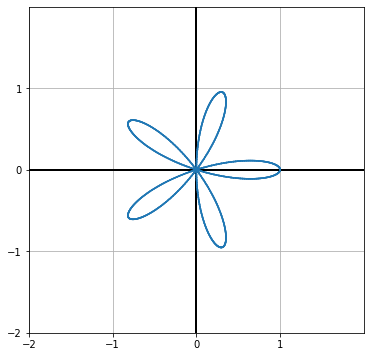

In [47]:
polar_coordinates = [(cos(5 * x * pi / 500.0), 2 * pi * x / 1000.0) for x in range(0, 1000)]

cartesian_coordinates = [to_cartesian((p[0], p[1])) for p in polar_coordinates]

draw(
    Polygon(*cartesian_coordinates)
)

## Find another point in the plane with the $ tan(θ) = \frac{-3}{2} $. Use Python's implementation of the arctangen function to find the value of this angle.

In [48]:
from math import atan

def to_degrees(radians):
    return (radians * 180) / pi

angle = atan(-3 / 2)
print('θ = atan(-3/2) = {0} radians = {1}°'.format(angle, to_degrees(angle)))


θ = atan(-3/2) = -0.982793723247329 radians = -56.309932474020215°


As the tangent significance is:

$
tan(θ) = \frac{y_coord}{x_coord}
$

There will be an angle between 270° and 360°, and another one between 90° and 180°.

## Without using Python, what are the polar coordinates corresponding to the Cartesian coordinates $ (1, 1) $ and $ (1, -1) $. Then use `to_polar(...)` to validate the answer.

The first thing is to sketch both vectors to get some context about the solutions:

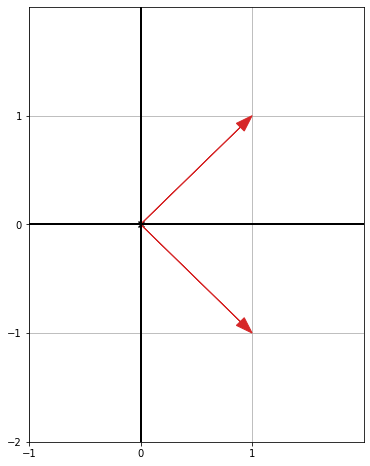

In [49]:
draw(
    Arrow((1, 1)),
    Arrow((1, -1))
)

$
\vec{v} = (1, 1) = (\sqrt{2}, \frac{\pi}{4}) \\
\vec{u} =(1, -1) = (\sqrt{2}, \frac{7 \cdot \pi}{4}) = (\sqrt{2}, -\frac{\pi}{4})
$

In [50]:
from math import atan2

def to_polar(vector):
    x, y = vector[0], vector[1] # destructuring
    angle = atan2(y, x)
    return (length(vector), angle)

v = (1, 1)
print('to_polar(v) = {0}; (pi/4) = {1}'.format(to_polar(v), pi / 4))

u = (1, -1)
print('to_polar(u) = {0}; -(pi/4) = {1}'.format(to_polar(u), -pi / 4))

to_polar(v) = (1.4142135623730951, 0.7853981633974483); (pi/4) = 0.7853981633974483
to_polar(u) = (1.4142135623730951, -0.7853981633974483); -(pi/4) = -0.7853981633974483


## What is the angle of the dinosaur's mouth? What is the angle of the dinosaur's toe? Of the point of its tail?

Let's draw the dino first.

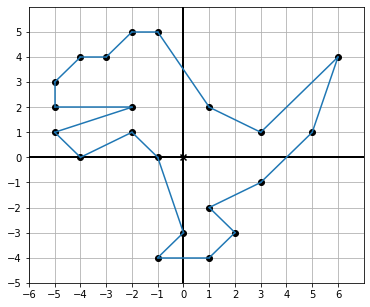

In [51]:
sorted_dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(Points(*sorted_dino_points), Polygon(*sorted_dino_points))

Let's focus on the mouth first:

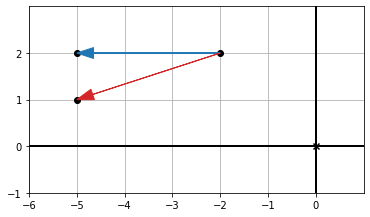

In [52]:
mouth_dino_points = [(-5, 2), (-2, 2), (-5, 1)]

draw(
    Points(*mouth_dino_points), 
    Arrow((-5, 2), (-2, 2), color=blue), Arrow((-5, 1), (-2, 2), color=red)
    )

Therefore, the angle of the mouth will be the result of subtracting the angle of the red vector from the angle of the blue vector. However, the vectors should be translated to the origin first.



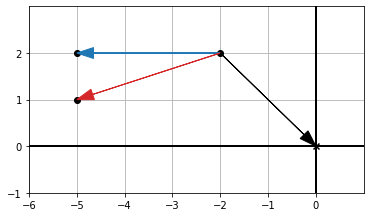

In [59]:
from vector_drawing import black

draw(
    Points(*mouth_dino_points), 
    Arrow((-5, 2), (-2, 2), color=blue), Arrow((-5, 1), (-2, 2), color=red),
    Arrow((0, 0), (-2, 2), color=black)
)


Let's move those vectors to the origin

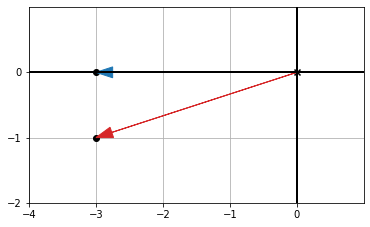

In [63]:
blue_vector = ((-5, 2), (-2, 2))
red_vector = ((-5, 1), (-2, 2))

def translate_to_origin(vector_coords):
    vector_tip = vector_coords[0]
    vector_tail = vector_coords[1]
    return subtract(vector_tip, vector_tail)

blue_vector_translated = translate_to_origin(blue_vector)
red_vector_translated = translate_to_origin(red_vector)

draw(
    Points(blue_vector_translated, red_vector_translated),
    Arrow(blue_vector_translated, color= blue),
    Arrow(red_vector_translated, color=red)
    )

Now we can compute the angle between the blue and red vector by calculating their corresponding polar coordinates and subtracting red angle from blue angle:

In [68]:
blue_vector_translated_polar = to_polar(blue_vector_translated)
red_vector_translated_polar = to_polar(red_vector_translated)

print(blue_vector_translated_polar)
print(red_vector_translated_polar)

# This is to enforce having only positive angles
def normalize_angle(angle):
    if angle < 0:
        return angle + (2 * pi)
    else:
        return angle

angle_rad = normalize_angle(red_vector_translated_polar[1]) - normalize_angle(blue_vector_translated_polar[1])
angle_deg = to_degrees(angle_rad)

print('Mouth angle = {0}°'.format(angle_deg))

(3.0, 3.141592653589793)
(3.1622776601683795, -2.819842099193151)
Mouth angle = 18.434948822922006°


Now, let's summarize to see if we can completely automate it, so that we can calculate the angle of any two given points of the dinosaur.

Actions:
+ Translate the vectors that identify the angle to the origin using translate to origin
+ Transform the translated vectors to their corresponding polar coordinates
+ Subtract the angles from both vectors

Let's validate it works for the other angles we have to calculate.


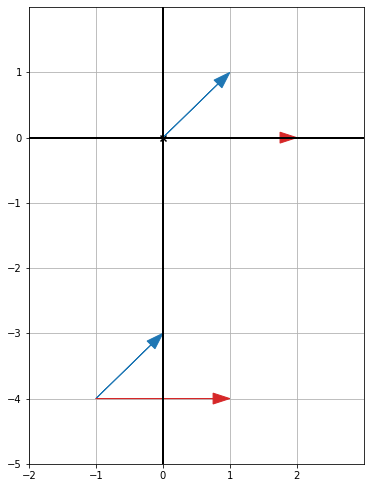

Toe angle = 45.0°


In [76]:
toe_blue_vector = ((0, -3), (-1, -4))
toe_red_vector = ((1, -4), (-1, -4))

toe_blue_vector_translated = translate_to_origin(toe_blue_vector)
toe_red_vector_translated = translate_to_origin(toe_red_vector)

draw(
    Arrow(*toe_blue_vector, color=blue),
    Arrow(*toe_red_vector, color=red),
    Arrow(toe_blue_vector_translated, color=blue),
    Arrow(toe_red_vector_translated, color=red)
)


toe_blue_vector_translated_polar = to_polar(toe_blue_vector_translated)
toe_red_vector_translated_polar = to_polar(toe_red_vector_translated)

toe_angle_rad = normalize_angle(toe_blue_vector_translated_polar[1]) - normalize_angle(toe_red_vector_translated_polar[1])

toe_angle_deg = to_degrees(toe_angle_rad)

print('Toe angle = {0}°'.format(toe_angle_deg))

Now, we can even define a function that does everything:

| NOTE: |
| :---- |
| `abs()` was added because it is not clear how the subtraction has to take place. |

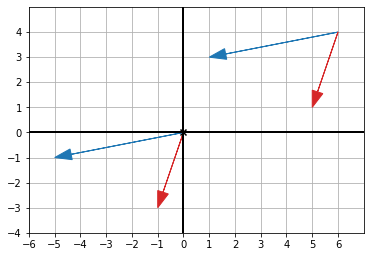

tail angle = 60.255118703057796°


In [81]:
def calculate_dino_angle(part_label, vector1, vector2):
    toe_blue_vector = ((0, -3), (-1, -4))
    toe_red_vector = ((1, -4), (-1, -4))

    vector1_translated = translate_to_origin(vector1)
    vector2_translated = translate_to_origin(vector2)

    draw(
        Arrow(*vector1, color=blue),
        Arrow(*vector2, color=red),
        Arrow(vector1_translated, color=blue),
        Arrow(vector2_translated, color=red)
    )

    vector1_translated_polar = to_polar(vector1_translated)
    vector2_translated_polar = to_polar(vector2_translated)

    angle_rad = abs(normalize_angle(vector1_translated_polar[1]) - normalize_angle(vector2_translated_polar[1]))

    angle_deg = to_degrees(angle_rad)

    return '{0} angle = {1}°'.format(part_label, angle_deg)


str = calculate_dino_angle('tail', ((1, 3), (6, 4)), ((5, 1), (6, 4)))
print(str)

Now we can validate the previous calculations using the function:

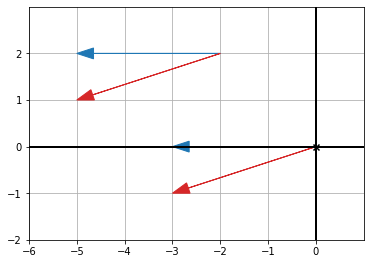

mouth angle = 18.434948822922006°


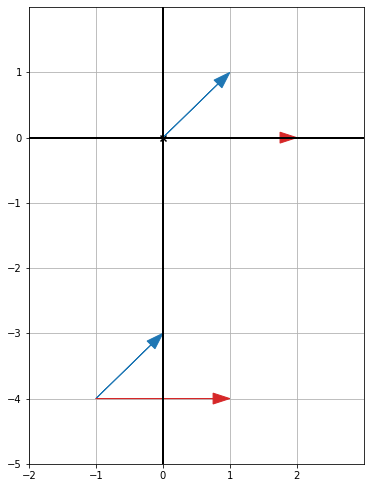

toe angle = 45.0°


In [85]:
print(calculate_dino_angle('mouth', ((-5, 2), (-2, 2)), ((-5, 1), (-2, 2))))
print(calculate_dino_angle('toe',  ((0, -3), (-1, -4)), ((1, -4), (-1, -4))))